In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle

In [7]:
df = pd.read_csv('../alzheimers_disease_data.csv')

In [8]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [9]:
df = df.drop(['PatientID', 'DoctorInCharge'], axis=1)

In [10]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness         

In [11]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_test_scaled

array([[-0.65455233,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098,  1.50600825],
       [-0.32185704, -1.00993886, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699],
       [ 0.56533038, -1.00993886, -0.70353326, ..., -0.42118554,
        -0.43356098,  1.50600825],
       ...,
       [ 0.89802567,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699],
       [ 0.56533038,  0.99015895, -0.70353326, ...,  2.37425054,
        -0.43356098, -0.66400699],
       [ 1.34161938,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699]], shape=(430, 32))

In [13]:
X_train_scaled

array([[ 1.23072095, -1.00993886,  1.29874103, ..., -0.42118554,
        -0.43356098,  1.50600825],
       [-1.43084133,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699],
       [ 0.01083824, -1.00993886, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699],
       ...,
       [ 0.01083824,  0.99015895,  2.29987818, ..., -0.42118554,
        -0.43356098, -0.66400699],
       [ 0.12173667,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699],
       [-0.87634919,  0.99015895, -0.70353326, ..., -0.42118554,
        -0.43356098, -0.66400699]], shape=(1719, 32))

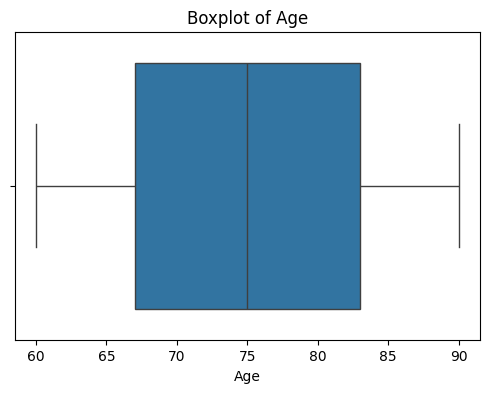

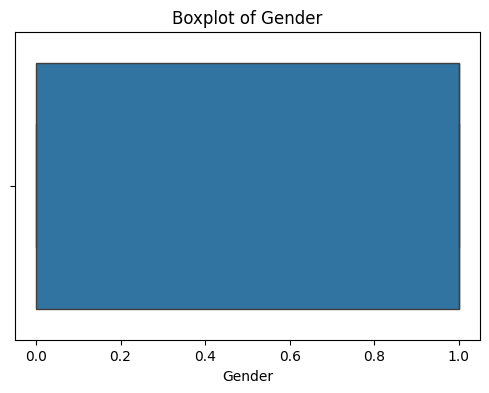

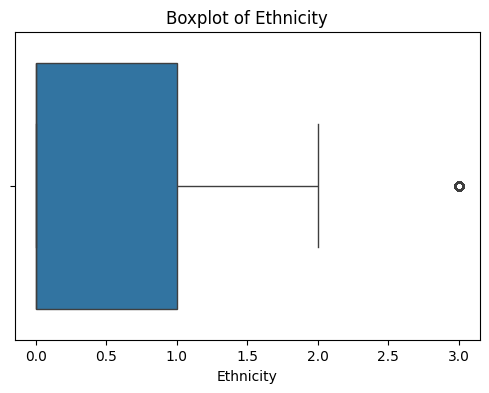

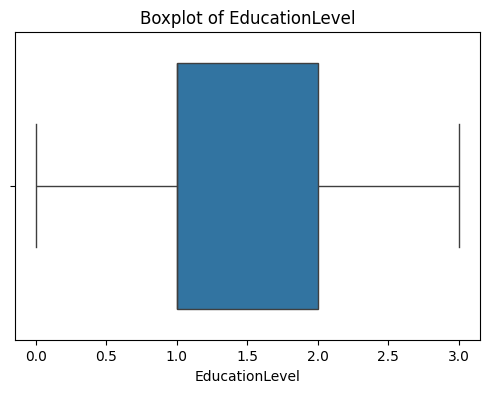

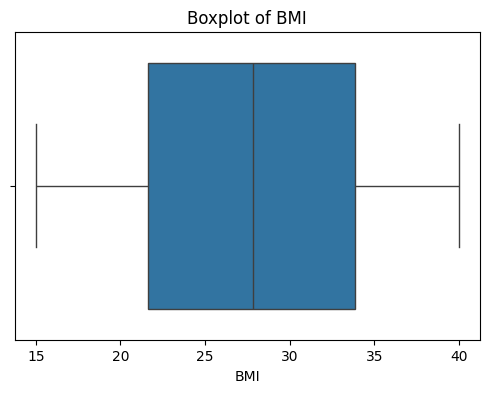

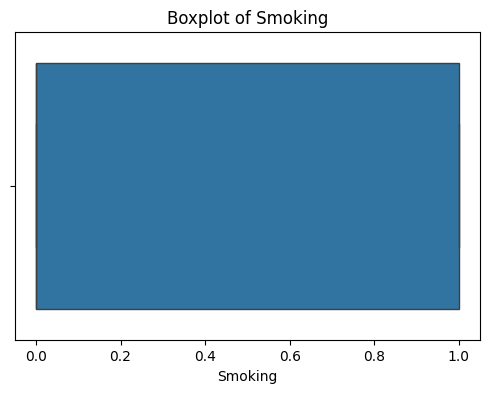

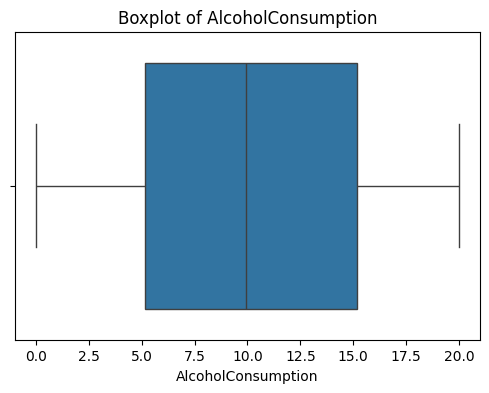

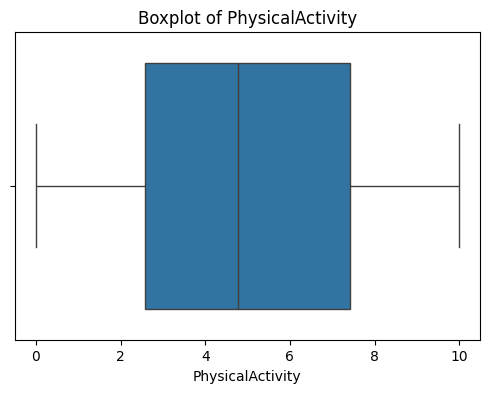

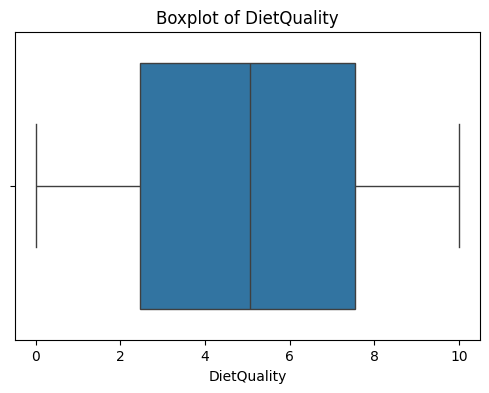

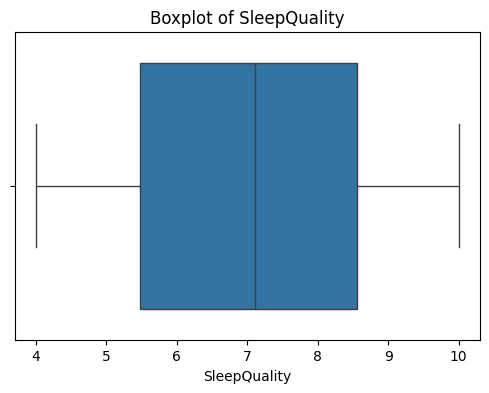

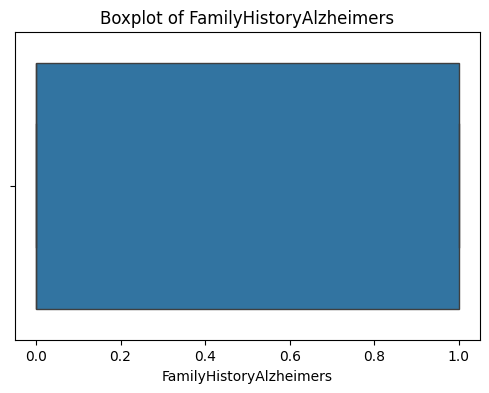

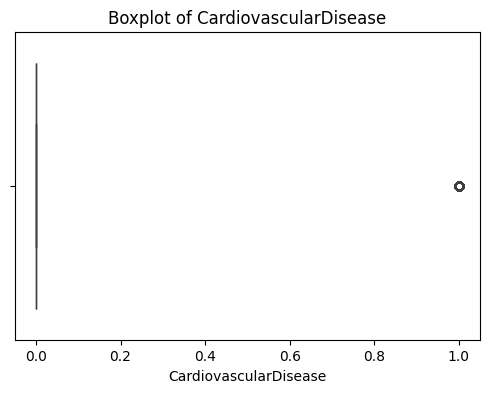

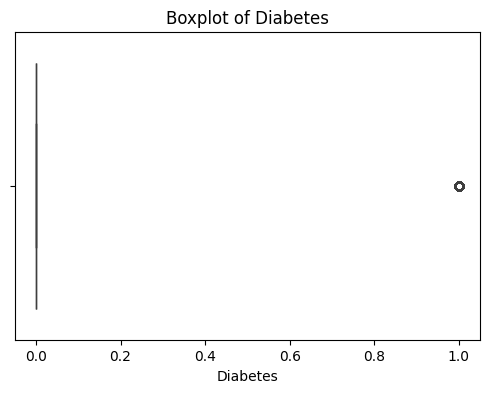

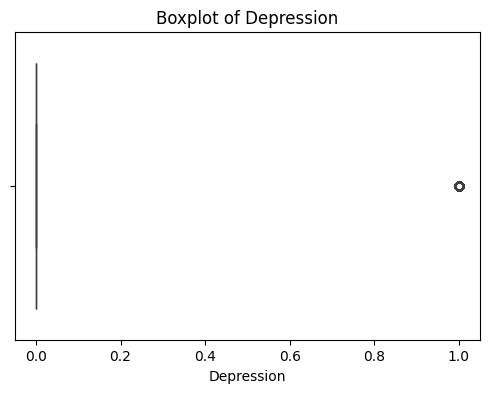

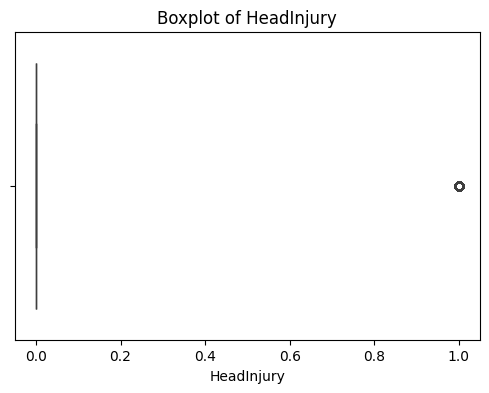

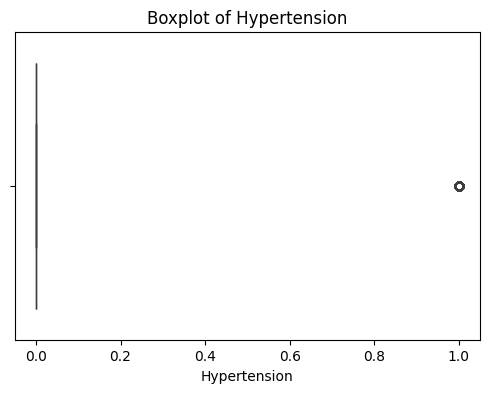

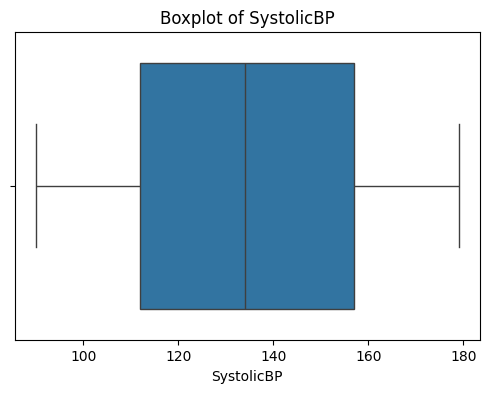

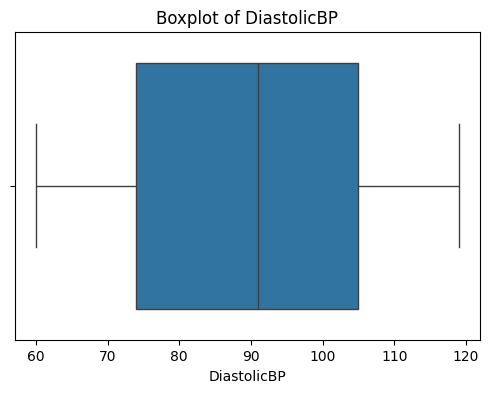

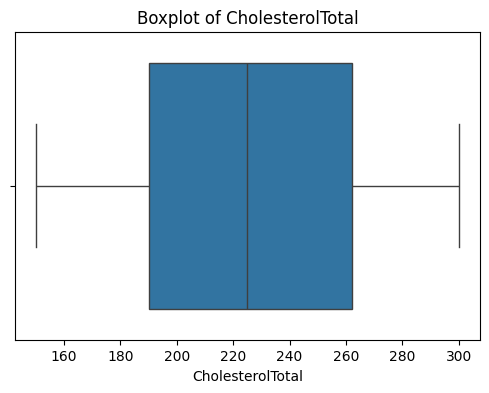

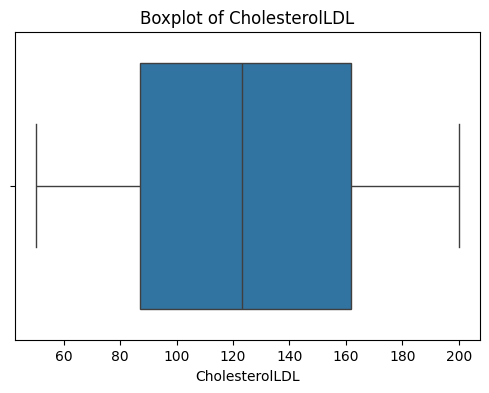

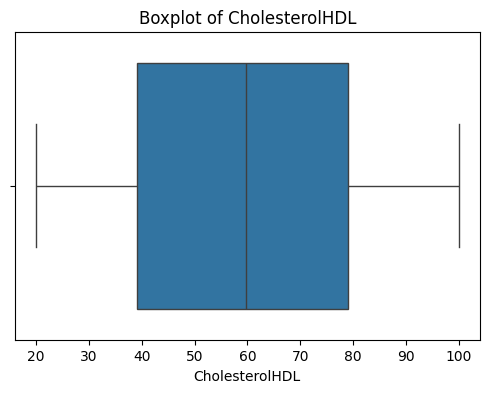

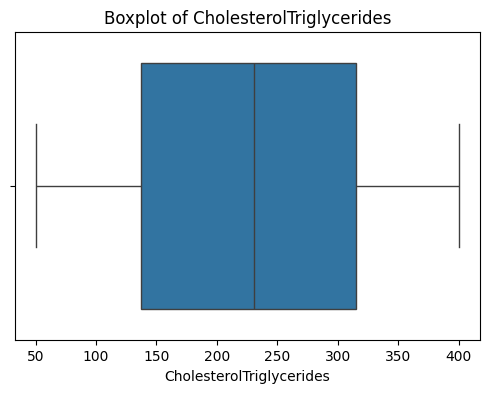

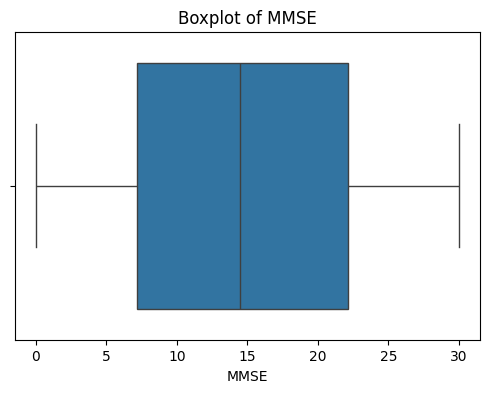

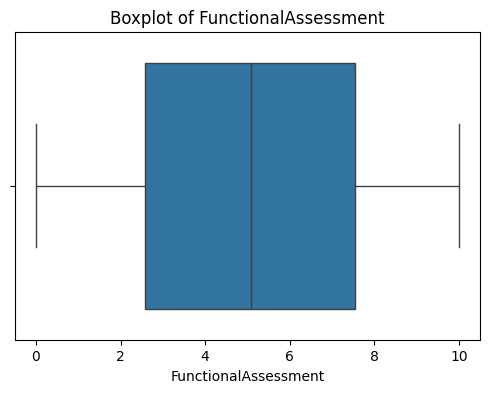

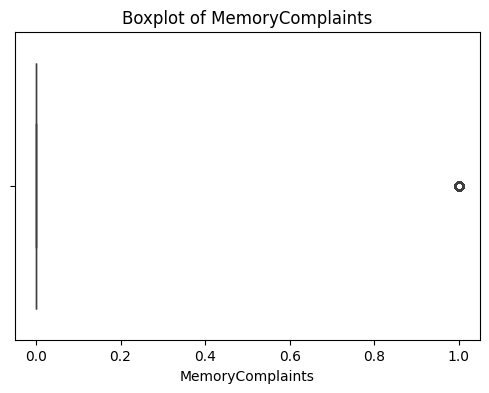

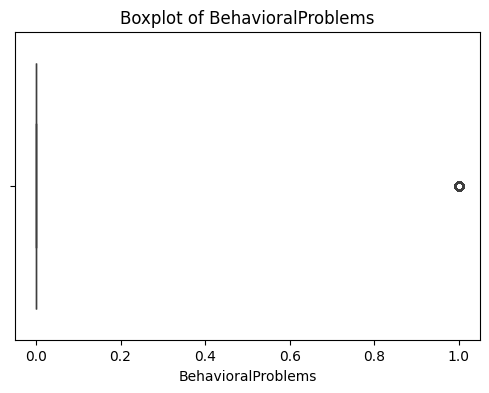

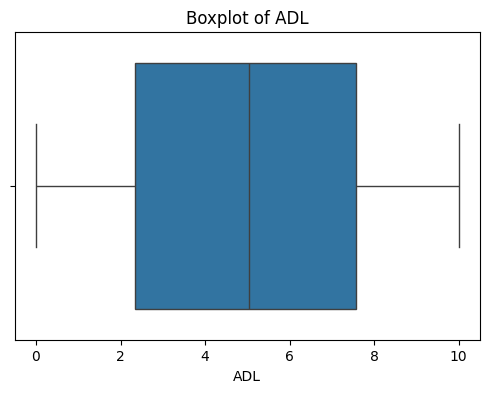

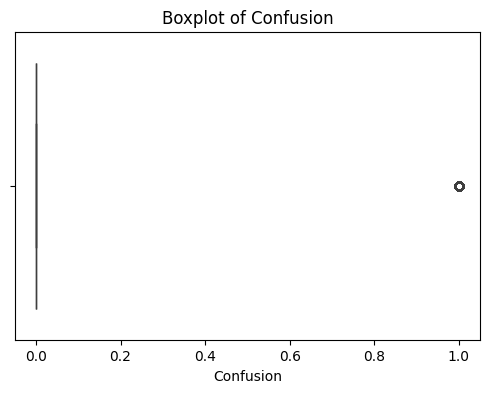

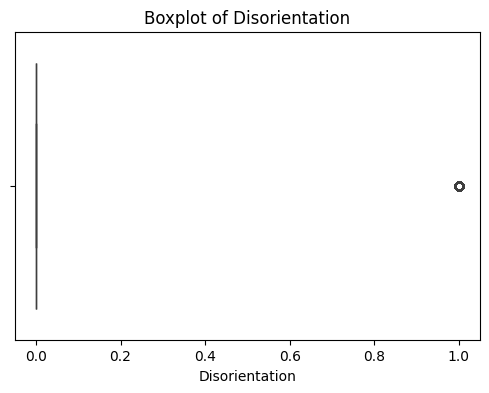

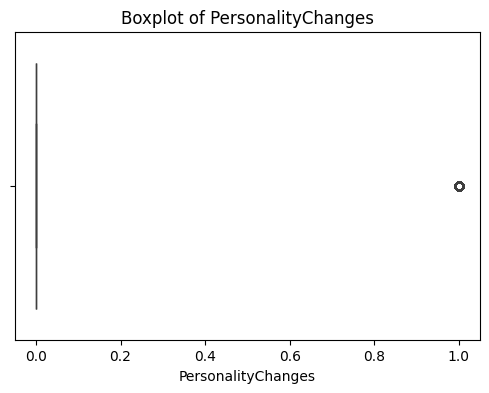

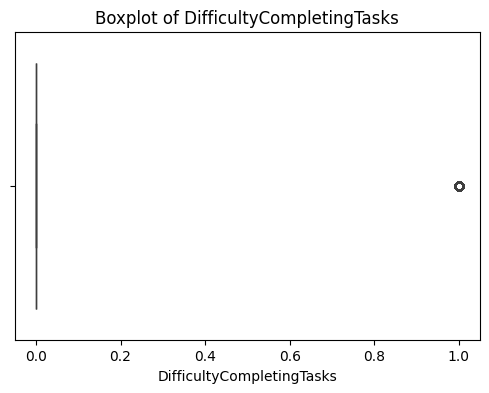

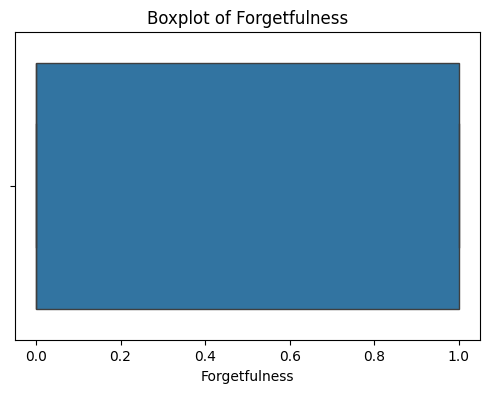

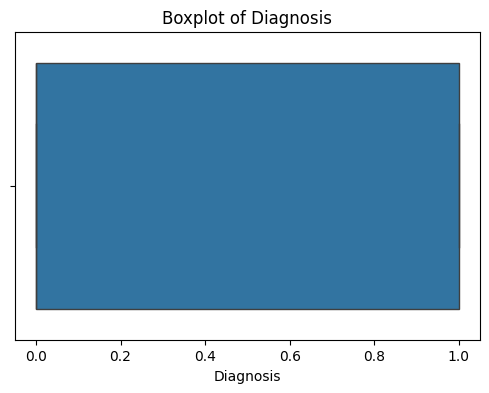

In [14]:
# Check for Outlier
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [15]:
# 80 20 NO HYPERPARAMETER TUNING

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(n_estimators=200, 
                             random_state=42, 
                             class_weight='balanced',
                             max_depth=10)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

with open('alzheimer_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\nModel and scaler saved as 'alzheimer_model.pkl' and 'scaler.pkl'")


Model Evaluation:
Accuracy: 0.9395348837209302

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       278
           1       0.94      0.89      0.91       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.93       430
weighted avg       0.94      0.94      0.94       430


Confusion Matrix:
 [[269   9]
 [ 17 135]]

Top 10 Important Features:
                     Feature  Importance
23      FunctionalAssessment    0.194282
26                       ADL    0.172172
22                      MMSE    0.136011
24          MemoryComplaints    0.097228
25        BehavioralProblems    0.050276
8                DietQuality    0.027288
20            CholesterolHDL    0.027000
21  CholesterolTriglycerides    0.026943
4                        BMI    0.026604
9               SleepQuality    0.026432

Model and scaler saved as 'alzheimer_model.pkl' and 'scaler.pkl'


In [16]:
# 80 10 10 NO HYPERPARAMETER TUNING

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# 80% train, 10% validation, 10% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=1/9, random_state=42, stratify=y_temp)
# 1/9 = 0.111... so (0.9 * 1/9) = 0.1 of original data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

modelV2 = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    max_depth=10
)
modelV2.fit(X_train_scaled, y_train)

# === Evaluation on Training Set ===
y_train_pred = model.predict(X_train_scaled)
print("\n--- Training Set Evaluation ---")
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# === Evaluation on Validation Set ===
y_val_pred = modelV2.predict(X_val_scaled)
print("\n--- Validation Set Evaluation ---")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# === Evaluation on Test Set ===
y_test_pred = modelV2.predict(X_test_scaled)
print("\n--- Test Set Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# === Feature Importance ===
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': modelV2.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# === Save modelV2 and scaler ===
with open('alzheimer_model_v2.pkl', 'wb') as f:
    pickle.dump(modelV2, f)

with open('scaler_v2.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\nModel and scaler saved as 'alzheimer_model_v2.pkl' and 'scaler_v2.pkl'")


--- Training Set Evaluation ---
Accuracy: 0.9755671902268761

--- Validation Set Evaluation ---
Accuracy: 0.9441860465116279
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       139
           1       0.96      0.88      0.92        76

    accuracy                           0.94       215
   macro avg       0.95      0.93      0.94       215
weighted avg       0.94      0.94      0.94       215

Confusion Matrix:
 [[136   3]
 [  9  67]]

--- Test Set Evaluation ---
Accuracy: 0.9395348837209302
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       139
           1       0.93      0.89      0.91        76

    accuracy                           0.94       215
   macro avg       0.94      0.93      0.93       215
weighted avg       0.94      0.94      0.94       215

Confusion Matrix:
 [[134   5]
 [  8  68]]

Top 10 Important Features:
  

In [17]:
# === Separate features and target ===
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# === Split into 80% train, 10% validation, 10% test ===
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=1/9, random_state=42, stratify=y_temp)

# === Feature scaling ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# === Hyperparameter tuning with GridSearchCV ===
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

base_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'
)

grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# === Best model from grid search ===
modelHPT = grid_search.best_estimator_
print("\nBest Hyperparameters:", grid_search.best_params_)

# === Evaluation on Training Set ===
y_train_pred = modelHPT.predict(X_train_scaled)
print("\n--- Training Set Evaluation ---")
print("Accuracy:", accuracy_score(y_train, y_train_pred))

# === Evaluation on Validation Set ===
y_val_pred = modelHPT.predict(X_val_scaled)
print("\n--- Validation Set Evaluation ---")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# === Evaluation on Test Set ===
y_test_pred = modelHPT.predict(X_test_scaled)
print("\n--- Test Set Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# === Feature Importance ===
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': modelHPT.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# === Save the optimized model and scaler ===
with open('alzheimer_model_hpt.pkl', 'wb') as f:
    pickle.dump(modelHPT, f)

with open('scaler_hpt.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\nModel and scaler saved as 'alzheimer_model_hpt.pkl' and 'scaler_hpt.pkl'")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

--- Training Set Evaluation ---
Accuracy: 0.9621873182082606

--- Validation Set Evaluation ---
Accuracy: 0.9488372093023256
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       139
           1       0.96      0.89      0.93        76

    accuracy                           0.95       215
   macro avg       0.95      0.94      0.94       215
weighted avg       0.95      0.95      0.95       215

Confusion Matrix:
 [[136   3]
 [  8  68]]

--- Test Set Evaluation ---
Accuracy: 0.958139534883721
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       139
           1       0.94      0.95      0.94        76

    accuracy                           0.96       215
   macro avg

In [18]:
def plot_confusion(y_true, y_pred, title, filename):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()
    plt.savefig(filename, bbox_inches='tight')  # Save the plot
    plt.close()

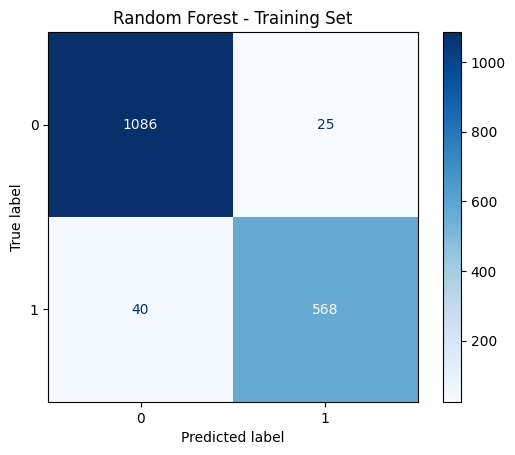

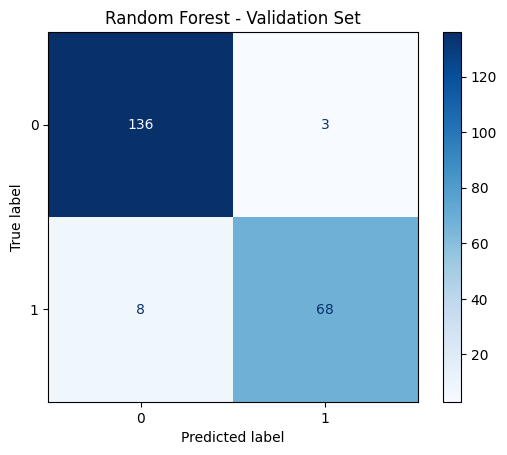

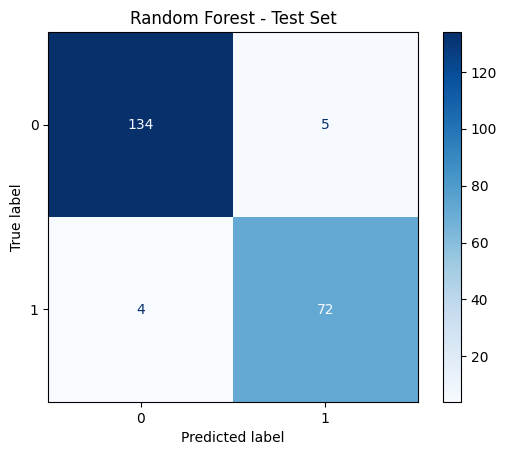

In [19]:
# Training Set
plot_confusion(y_train, y_train_pred, "Random Forest - Training Set", "rf_train_confusion.png")

# Validation Set
plot_confusion(y_val, y_val_pred, "Random Forest - Validation Set", "rf_validate_confusion.png")

# Test Set
plot_confusion(y_test, y_test_pred, "Random Forest - Test Set", "rf_test_confusion.png")

In [20]:
rf_accuracies = {
    "Training": accuracy_score(y_train, y_train_pred),
    "Validation": accuracy_score(y_val, y_val_pred),
    "Test": accuracy_score(y_test, y_test_pred)
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(rf_accuracies.keys()), y=list(rf_accuracies.values()), palette="viridis")
plt.title("Random Forest Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.savefig("rf_accuracy_comparison.png", bbox_inches='tight')
plt.close()

C:\Users\Asus VivobookPro\AppData\Local\Temp\ipykernel_23820\3264142331.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(rf_accuracies.keys()), y=list(rf_accuracies.values()), palette="viridis")


In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importance['Importance'].head(10),
    y=feature_importance['Feature'].head(10),
    palette="crest"
)
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig("rf_feature_importance.png", bbox_inches='tight')
plt.close()

C:\Users\Asus VivobookPro\AppData\Local\Temp\ipykernel_23820\1180581032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


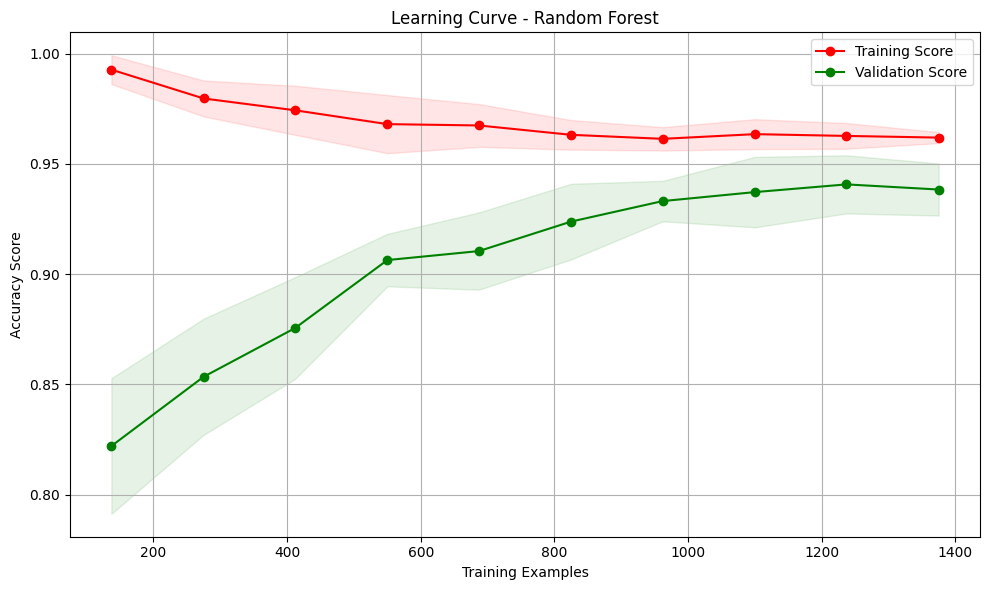

In [22]:
# VISUALIZATION
modelVis = modelHPT 

train_sizes, train_scores, val_scores = learning_curve(
    estimator=modelVis,
    X=X_train_scaled,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42,
    n_jobs=-1
)

# Compute mean and std
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# === Plotting ===
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='red', label='Training Score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='green', label='Validation Score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color='green')

plt.title("Learning Curve - Random Forest")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy Score")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig("learning_curve_rf.png")
plt.show()

In [23]:
# TESTING FUNCTION

def predict_with_probability(new_data):
    new_data_df = pd.DataFrame([new_data])
    new_data_scaled = scaler.transform(new_data_df)
    
    prediction = model.predict(new_data_scaled)[0]
    probability = model.predict_proba(new_data_scaled)[0][1]  
    
    return prediction, probability

In [24]:
# USAGE OF TESTING FUNC

# NEGATIVE - DARI DIHSEEK
input_data_dih_seek = {
    'Age': 75,
    'Gender': 1,
    'Ethnicity': 2,
    'EducationLevel': 1,
    'BMI': 26.5,
    'Smoking': 0,
    'AlcoholConsumption': 10.2,
    'PhysicalActivity': 5.8,
    'DietQuality': 6.3,
    'SleepQuality': 7.5,
    'FamilyHistoryAlzheimers': 0,
    'CardiovascularDisease': 0,
    'Diabetes': 0,
    'Depression': 0,
    'HeadInjury': 0,
    'Hypertension': 1,
    'SystolicBP': 135,
    'DiastolicBP': 85,
    'CholesterolTotal': 220.5,
    'CholesterolLDL': 120.3,
    'CholesterolHDL': 55.2,
    'CholesterolTriglycerides': 180.4,
    'MMSE': 24.5,
    'FunctionalAssessment': 7.2,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'ADL': 2.1,
    'Confusion': 0,
    'Disorientation': 0,
    'PersonalityChanges': 0,
    'DifficultyCompletingTasks': 1,
    'Forgetfulness': 1
}

# POSITIVE - DARI CSV
input_data_61 = {
    'Age': 61,
    'Gender': 0,
    'Ethnicity': 0,
    'EducationLevel': 0,
    'BMI': 19.09,
    'Smoking': 0, 
    'AlcoholConsumption': 3.732,
    'PhysicalActivity': 0.37,
    'DietQuality': 4.125,
    'SleepQuality': 5.11,
    'FamilyHistoryAlzheimers': 0, 
    'CardiovascularDisease': 0, 
    'Diabetes': 1, 
    'Depression': 0, 
    'HeadInjury': 0, 
    'Hypertension': 0, 
    'SystolicBP': 171,
    'DiastolicBP': 115,
    'CholesterolTotal': 202.303,
    'CholesterolLDL': 128.555,
    'CholesterolHDL': 67.64,
    'CholesterolTriglycerides': 119.334,
    'MMSE': 4.95,
    'FunctionalAssessment': 3.18,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'ADL': 4.42,
    'Confusion': 0, 
    'Disorientation': 1, 
    'PersonalityChanges': 0, 
    'DifficultyCompletingTasks': 1, 
    'Forgetfulness': 1,
}

# POSITIVE - DARI CSV
input_data_75 = {
    'Age': 75,
    'Gender': 0,
    'Ethnicity': 0,
    'EducationLevel': 0,
    'BMI': 18.776,
    'Smoking': 0, 
    'AlcoholConsumption': 13.723,
    'PhysicalActivity': 4.469,
    'DietQuality': 8.341,
    'SleepQuality': 4.213,
    'FamilyHistoryAlzheimers': 0, 
    'CardiovascularDisease': 0, 
    'Diabetes': 0, 
    'Depression': 0, 
    'HeadInjury': 0, 
    'Hypertension': 0, 
    'SystolicBP': 117,
    'DiastolicBP': 63,
    'CholesterolTotal': 151.383,
    'CholesterolLDL': 69.623,
    'CholesterolHDL': 77.346,
    'CholesterolTriglycerides': 210.5,
    'MMSE': 10.139,
    'FunctionalAssessment': 3.401,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'ADL': 4.517,
    'Confusion': 1, 
    'Disorientation': 0, 
    'PersonalityChanges': 0, 
    'DifficultyCompletingTasks': 0, 
    'Forgetfulness': 1,
}

# NEGATIVE - DARI CSV
input_data_78 = {
    'Age': 78,
    'Gender': 0,
    'Ethnicity': 0,
    'EducationLevel': 2,
    'BMI': 22.463,
    'Smoking': 1, 
    'AlcoholConsumption': 19.300,
    'PhysicalActivity': 3.834,
    'DietQuality': 8.279,
    'SleepQuality': 8.312,
    'FamilyHistoryAlzheimers': 0, 
    'CardiovascularDisease': 0, 
    'Diabetes': 1, 
    'Depression': 0, 
    'HeadInjury': 0, 
    'Hypertension': 1, 
    'SystolicBP': 165,
    'DiastolicBP': 97,
    'CholesterolTotal': 254.586,
    'CholesterolLDL': 132.960,
    'CholesterolHDL': 39.009,
    'CholesterolTriglycerides': 344.448,
    'MMSE': 21.205,
    'FunctionalAssessment': 5.568,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'ADL': 5.467,
    'Confusion': 0, 
    'Disorientation': 1, 
    'PersonalityChanges': 0, 
    'DifficultyCompletingTasks': 1, 
    'Forgetfulness': 1,
}

prediction, probability = predict_with_probability(input_data_dih_seek) # Ganti aja mau pilih yg mana
print(f"\nExample Prediction: {prediction} (0 = No Alzheimer's, 1 = Alzheimer's)")
print(f"Probability of Alzheimer's: {probability:.2%}")


Example Prediction: 0 (0 = No Alzheimer's, 1 = Alzheimer's)
Probability of Alzheimer's: 5.91%
